In [1]:
'''
【课程3.3.2】 最邻近分类的python实现方法\
'''

'\n【课程3.3.2】 最邻近分类的python实现方法'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

   fight  kiss     name     type
0      3   104  北京遇上西雅图  Romance
1      2   100      喜欢你  Romance
2      1    81    疯狂动物城  Romance
3    101    10      战狼2   Action
4     99     5       力王   Action
5     98     2      敢死队   Action


Text(18,90,'<<你的名字>>')

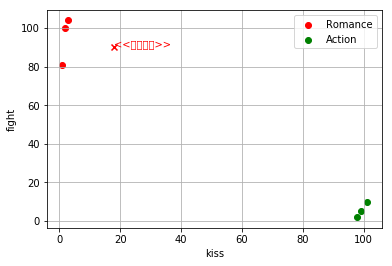

In [11]:
#  案例一：电影数据分类
from sklearn import neighbors                # 导入KNN分类模块
import warnings
warnings.filterwarnings('ignore')            # 不发出警告

data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                  'fight':[3,2,1,101,99,98],
                  'kiss':[104,100,81,10,5,2],
                  'type':['Romance','Romance','Romance','Action','Action','Action']})

print(data)                                   #  创建数据

knn = neighbors.KNeighborsClassifier()        # 取得knn分类器
knn.fit(data[['fight','kiss']],data['type'])  # 加载数据，构建KNN分类模型 
#print('预测电影类型为:',knn.predict([18,90])) # 预测未知数据

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color='r',marker='o',label='Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color='g',marker='o',label='Action')
plt.grid()
plt.legend()
plt.scatter(18,90,color='r',marker='x',label='Romance')
plt.xlabel('kiss')
plt.ylabel('fight')
plt.text(18,90,'<<你的名字>>',color='r')

        fight       kiss     type
0   -5.417138  20.759414  Romance
1  104.918542 -62.808757   Action
2  -30.804557   8.335924  Romance
3   15.464628 -25.397442   Action
4   20.399310 -22.223376   Action


Text(0,0.5,'fight')

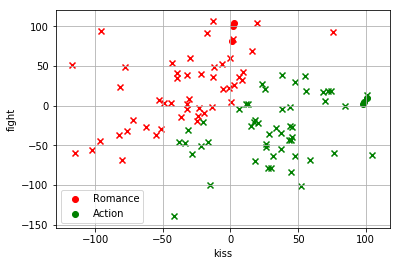

In [4]:
# 案例一：电影分类
# 给随机数据进行模拟预测

data2 = pd.DataFrame(np.random.randn(100,2)*50,columns=['fight','kiss'])
data2['type'] = knn.predict(data2)          # 创建数据，并调用模型预测                         
print(data2.head())

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color='r',marker='o',label='Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color='g',marker='o',label='Action')
plt.grid()
plt.legend()
plt.scatter(data2[data2['type'] == 'Romance']['fight'],data2[data2['type'] == 'Romance']['kiss'],color='r',marker='x',label='Romance')
plt.scatter(data2[data2['type'] == 'Action']['fight'],data2[data2['type'] == 'Action']['kiss'],color='g',marker='x',label='Action')
plt.xlabel('kiss')
plt.ylabel('fight')

In [14]:
# 案例二：植物分类
from sklearn import datasets

iris = datasets.load_iris()            # 导入数据
print(iris.keys())
print(f"数据的长度:{len(iris['data'])}")

print(iris.feature_names)
print(iris.target)
print(iris.target_names)
print(iris.data[:5])
'''
 150个实例数据
 feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width
 目标类别：Iris setosa, Iris versicolor, Iris virginica. 
'''

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
数据的长度:150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


'\n 150个实例数据\n feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width\n 目标类别：Iris setosa, Iris versicolor, Iris virginica. \n'

In [13]:
# 案例二：植物分类

df = pd.DataFrame(data=iris.data,columns=iris.feature_names) # 将特征值转为Dataframe\
df['target'] = iris.target
ty = pd.DataFrame({'target':[0,1,2],
                   'target_names':iris.target_names})

df = pd.merge(df,ty,on='target')                             # 数据转换
print (df)

knn = neighbors.KNeighborsClassifier()                       # 取得knn分类器
knn.fit(iris.data,df['target_names'])                        # 建立分类模型

per_data = [[0.1,0.2,0.3,0.4]]
print('预测结果为:',knn.predict(per_data))                   # 数据转换
print(df.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      